# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [32]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
#цель: посмотреть сколько пропусков по каждой категории взятия кредитов
na_income = data.loc[data['total_income'].isna() == True]
nan_total = na_income.groupby('purpose')['children'].count()
nan_total = nan_total.sort_values(ascending = False)
nan_total


#данный код запускается до выполнения скрипта по очистке данный от пропусков, но после выполнения функции по  разделениям на категории
#nan_total.groupby('purpose_category')['children'].count()


purpose
на проведение свадьбы                     92
сыграть свадьбу                           81
свадьба                                   76
строительство собственной недвижимости    75
операции с жильем                         74
покупка недвижимости                      72
покупка жилья для семьи                   71
операции со своей недвижимостью           71
ремонт жилью                              70
операции с коммерческой недвижимостью     70
покупка коммерческой недвижимости         67
покупка жилья для сдачи                   65
недвижимость                              62
операции с недвижимостью                  61
покупка жилой недвижимости                61
жилье                                     60
строительство недвижимости                59
автомобили                                57
заняться высшим образованием              56
заняться образованием                     55
сделка с подержанным автомобилем          54
на покупку своего автомобиля              53
по

In [5]:
nan_family_status = data.loc[data['total_income'].isna() == True]
nan_family_status_total = nan_family_status.groupby('income_type')['children'].count()
nan_family_status_total = nan_family_status_total.sort_values(ascending = False)
nan_family_status_total

income_type
сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: children, dtype: int64

In [ ]:
nan_family_status_total = nan_family_status_total.

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)


**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
print()

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

              debt
children          
0         0.075438
1         0.092346
2         0.094542
3         0.081818
4         0.097561
5         0.000000


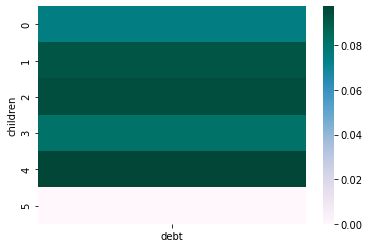

In [24]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# Дети столбец 'children'
# Просрочки столбец 'debt' 
# Описание столбца 'debt' -"0" нет просрочек; "1"просрочки 
# Чем показатель ближе к 1 тем ненадежнее клиент

import seaborn

children_index = data.pivot_table(index =['children'], values='debt')

seaborn.heatmap(data = children_index,cmap='PuBuGn')

print(children_index)

        

**Вывод:** 
Описание столбца 'debt' -"0" нет просрочек; "1"просрочки 
Чем показатель ближе к 1 тем ненадежнее клиент

Вывод:

'+' Клиенты без детей показывают лучший возврат кредитов 

'-' Клиенты с 4 детьми худший возврат кредитов 

Визуализация, представленная выше показывает клиенты с 3 детьми и вовсе без детей возвращают кредиты в схожие сроки


Примечание: обратить внимание на столбец 'children' по категории 5 детей, по ним просрочки не найдены, что вероятно ошибка в данных

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

data_family_index = data.pivot_table(index =['family_status'], values='debt')
print(data_family_index)

                           debt
family_status                  
Не женат / не замужем  0.097639
в разводе              0.070648
вдовец / вдова         0.066246
гражданский брак       0.093130
женат / замужем        0.075606


In [26]:
#Цель: узнать основную цель кредита по категории 'вдовец / вдова'

data[data['family_status'] == 'вдовец / вдова']['purpose'].value_counts()


покупка коммерческой недвижимости         43
покупка жилья                             39
строительство жилой недвижимости          36
операции с жильем                         36
покупка жилья для семьи                   35
операции со своей недвижимостью           34
операции с коммерческой недвижимостью     33
ремонт жилью                              32
сделка с подержанным автомобилем          32
строительство недвижимости                30
жилье                                     30
автомобиль                                30
операции с недвижимостью                  29
покупка недвижимости                      29
недвижимость                              29
покупка жилья для сдачи                   28
высшее образование                        28
строительство собственной недвижимости    27
получение дополнительного образования     26
образование                               26
на покупку автомобиля                     24
дополнительное образование                24
приобретен

In [27]:
#Цель: узнать основную цель кредита по категории 'Не женат / не замужем'
data[data['family_status'] == 'Не женат / не замужем']['purpose'].value_counts()

операции с недвижимостью                  108
жилье                                     104
операции с жильем                         103
строительство жилой недвижимости          100
покупка коммерческой недвижимости          99
покупка жилой недвижимости                 97
строительство собственной недвижимости     96
недвижимость                               95
операции со своей недвижимостью            94
покупка жилья для семьи                    92
ремонт жилью                               92
покупка жилья                              90
покупка своего жилья                       87
покупка жилья для сдачи                    86
строительство недвижимости                 85
операции с коммерческой недвижимостью      84
сделка с автомобилем                       78
на покупку подержанного автомобиля         77
автомобили                                 77
дополнительное образование                 76
приобретение автомобиля                    76
покупка недвижимости              

**Вывод:** 
Вывод проистекает из предыдущего задания:-"0" нет просрочек; "1"просрочки

'+' Лучшие плательщики клиенты в категории "вдовец / вдова", основной статей на что берется кредит в случае "вдовец / вдова" является сделки с недвижимостью, возможно решение взять кредит более взвешенное или есть конкретная цель, либо план действий по возврату кредита

'-' Худшие плательщики клиенты в категории "не женат / не замужем", основной статей на что берется кредит в случае "не женат / не замужем" ТОЖЕ является сделки с недвижимостью 

Возможно нужно включать в таблицу такие переменные как возраст заёмщика/цы и срок работы, гендерный признак для более верного вывода.


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

                           debt
total_income_category          
A                      0.080000
B                      0.070602
C                      0.084982
D                      0.060172
E                      0.090909


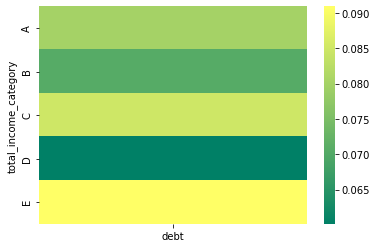

In [28]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

income_index = data.pivot_table(index =['total_income_category'], values='debt')
seaborn.heatmap(data = income_index,cmap='summer')

print(income_index)

''**Вывод:** 

Все заемщики поделены на 5 категорий

'A' 1000001 и 
'B' 200001–1000000 
'C' 50001–200000
'D' 30001–50000
'E' 0–30000

'+'Заемщики со средним доходом от 30001 до 50000 руб самые надежные 

'-'На заемщиков со средним доходом от 0 до 30000 руб, следует обратить особое внимание при выдачи кредитов, так как клиенты с данным уровнем дохода самые неблагонадежные


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
#purpose_index = data.pivot_table(index =['purpose'], values='debt')
#print(purpose_index.sort_values(by = 'debt'))

purpose_index_category = data.pivot_table(index =['purpose_category'], values='debt')
print(purpose_index_category)


                              debt
purpose_category                  
операции с автомобилем    0.093480
операции с недвижимостью  0.072551
получение образования     0.092528
проведение свадьбы        0.079118


**Вывод:** 

'+' Заемщики взявшие кредит на категорию  "операции с недвижимостью" самые надежные

'-' Заемщики взявшие кредит на категорию  "операции с автомобилем" либо "получение образования"  самые НЕнадежные


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Пропуски данных встречаются в столбцах время работы и заработок.

Скорее всего данные не запрашивались из-за суммы кредита, позволяющей не собирать данные о работе и заработке,
на незначительные суммы данные с работы не запрашивают.

(Также на данный вопрос я попытался ответить после вывода «сырого» датасета Задание 2, возможно вы поможете!?!)


Либо это некорректное заполнение данных по выдаче кредитов.



#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
В данном случае(количественных переменных) заполнение пропусков медианными данными лучше так как разница в зарплатах очень велика и если брать среднюю зарплату это может повлиять на общий вывод, и все пропуски будут заполнены данными с болшей зарплатой чем в реальности.
Пропусков 2174 из 21525, что является серьезным показателем в 10% 

медиана лучше)

In [30]:
per = 2174/21525
percent = per*100
print(percent)

10.099883855981417


### Шаг 4: общий вывод.

Напишите ваш общий вывод.

После проведённого анализа данных я могу сделать несколько рекомендаций.

Категория клиентов попадающих под портрет самых благонадежных заемщиков это:

Клиенты без детей или уже со взрослыми детьми больше 18 лет, со среднем доходом от 30001 до 50000 рублей, вдовцы / вдовы,(звучит не очень красиво по отношению к клиентам банка и вообще "чёрство", если у вас есть более подходящий вариант, могли бы написать? Спасибо.). Также целью кредита  должны быть "операции с недвижимостью".
Это идеальный вариант, который по проведенному анализу, с высокой долей вероятности, не доставить банку проблем.

Категория неблагонадёжных клиентов, на которых следует обратить особое внимание при выдаче займов это: 

Клиенты с 4 детьми худший возврат кредитов 
Худшие показатель возврата кредита показывают клиенты с доходом от 0 до 30000 руб, берущие кредит на категорию "операции с автомобилем" либо "получение образования", не женатые или не замужем.






<div class="alert alert-info">
ОБЩИЙ ВЫВОД

Был проведен анализ данных с целю выявить влияние некоторых факторов на возможность клиентов выплачивать взятый кредит в срок. Данные для анализа - это предоставленная банком ПАО "Александр" сводная статистическая таблица платёжеспособностей клиентов. Результаты исследования будут применены при выдаче кредитов в 2023 году. 
    
Перед проведением исследования были поставлена задача выявить:

1)зависимость между количеством детей и возвратом кредита в срок?
2)зависимость между семейным положением и возвратом кредита в срок?
3)зависимость между уровнем дохода и возвратом кредита в срок?
4)как разные цели кредита влияют на его возврат в срок?



Задача 1 выявила:

'+' Клиенты без детей показывают лучший возврат кредитов
'-' Клиенты с 4 детьми худший возврат кредитов 

Рекомендация: дополнить данные и провести повторный анализ с полным перечнем статистических данных
    

Задача 2 выявила:

'+' Лучшие плательщики клиенты в категории "вдовец / вдова", основной статей на что берется кредит в случае "вдовец / вдова" является сделки с недвижимостью, возможно решение взять кредит более взвешенное или есть конкретная цель, либо план действий по возврату кредита

'-' Худшие плательщики клиенты в категории "не женат / не замужем", основной статей на что берется кредит в случае "не женат / не замужем" ТОЖЕ является сделки с недвижимостью 

Рекомендация: включать в таблицу такие переменные как возраст заёмщика/цы и срок работы, гендерный признак для более верного вывода.


Задача 3 выявила


'+'Заемщики со средним доходом от 30001 до 50000 руб самые надежные

'-'На заемщиков со средним доходом от 0 до 30000 руб, следует обратить особое внимание при выдачи кредитов, так как клиенты с данным уровнем дохода самые неблагонадежные

Рекомендация: принять в работу
    
    
Задача 4 выявила

'+' Заемщики взявшие кредит на категорию "операции с недвижимостью" самые надежные

'-' Заемщики взявшие кредит на категорию "операции с автомобилем" либо "получение образования" самые НЕ надежные
    
Рекомендация: принять в работу
*****************************************************
    
После проведённого анализа данных, я могу обозначить портрет благонадёжного клиента, подходящий по всем параметрам.
    И клиентов требующих дополнительных проверок
    
Категория клиентов попадающих под портрет самых благонадежных заемщиков это:

Клиенты без детей или уже со взрослыми детьми больше 18 лет, со средним доходом от 30001 до 50000 рублей, вдовцы / вдовы, (звучит не очень красиво по отношению к клиентам банка и вообще "чёрство", если у вас есть более подходящий вариант, могли бы написать? Спасибо.). Также целью кредита должны быть "операции с недвижимостью".
Это идеальный вариант, который по проведенному анализу, с высокой долей вероятности, не доставить банку проблем.

Категория неблагонадёжных клиентов, на которых следует обратить особое внимание при выдаче займов это: 

Клиенты с 4 детьми худший возврат кредитов 
Худшие показатель возврата кредита показывают клиенты с доходом от 0 до 30000 руб, берущие кредит на категорию "операции с автомобилем" либо "получение образования", не женатые или не замужем.
    
Сотрудникам банка можно использовать 3 и 4 выводы для принятия решений об одобрении кредитов, а также
дополнить данными задачи 1 и 2

    
</div>